<img src="../img/GTK_Logo_Social Icon.jpg" width=175 align="right" />


# Worksheet 5.3 - Tuning your Classifier
This worksheet covers concepts relating to tuning a classifier.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  


## Import the Libraries
For this exercise, we will be using:
* Pandas (https://pandas.pydata.org/pandas-docs/stable/)
* Numpy (https://docs.scipy.org/doc/numpy/reference/)
* Matplotlib (https://matplotlib.org/api/pyplot_api.html)
* Scikit-learn (https://scikit-learn.org/stable/documentation.html)
* YellowBrick (https://www.scikit-yb.org/en/latest/)
* Seaborn (https://seaborn.pydata.org)
* Lime (https://github.com/marcotcr/lime)

In [7]:
# Load Libraries - Make sure to run this cell!
import pandas as pd
import numpy as np
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform as sp_rand
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
import matplotlib
import lime
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## Prepare the Data
For this exercise, we are going to focus on building a pipeline and then tuning the resultant model, so we're going to use our data from the last worksheet.  

In [2]:
df_final = pd.read_csv('../data/dga_features_final_df.csv')
y = df_final['isDGA']
X = df_final.drop(['isDGA'], axis=1)
X.sample(5)

,length,digits,entropy,vowel-cons,firstDigitIndex,ngrams
676,14,0,3.235926,0.166667,0,889.532051
1431,8,0,2.405639,0.600000,0,1649.075397
851,13,0,3.700440,0.300000,0,888.796426
64,14,0,3.093069,0.272727,0,860.145604
425,12,0,3.084963,0.333333,0,1045.758586


### Split the data into training and testing sets.
We're going to need a training and testing dataset, so you know the drill, split the data..

In [3]:
# Simple Cross-Validation: Split the data set into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Build a Model
For this exercise, we're going to create a K-NN Classifier for the DGA data and tune it, but first, create a classifier with the default options and calculate the accuracy score for it. (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) 

The default parameters are shown below.
```python 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
```           

In [4]:
# Your code here ...
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn = knn.fit(X_train, y_train)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 0 0 1 

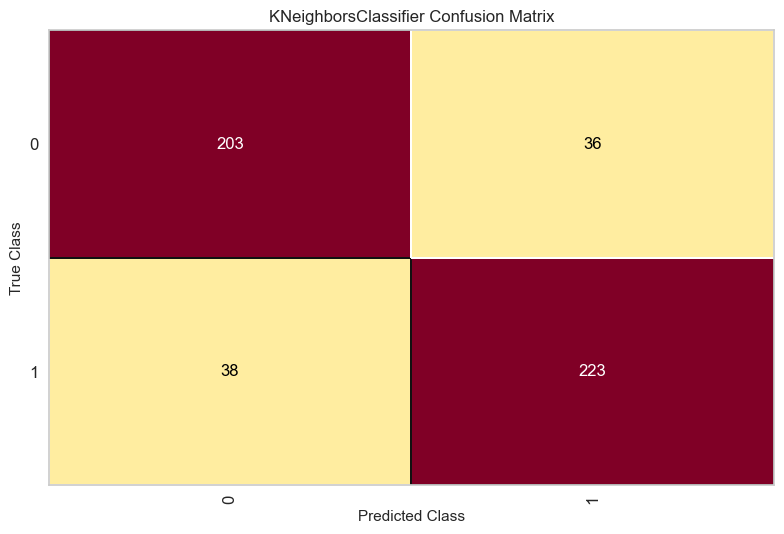

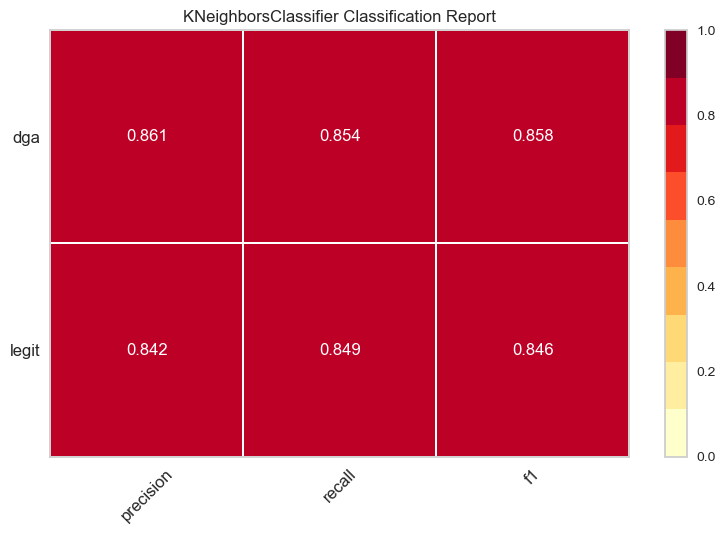

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [15]:
#Store the predictions
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

# Make the prediction
X_test_pred = knn.predict(X_test)
print(X_test_pred)
print('\n')
print(accuracy_score(y_test, X_test_pred))

#Confusion Matrix
matrix = ConfusionMatrix(knn)
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show()

#Classification Report
class_report = ClassificationReport(knn, classes =['legit', 'dga'])
class_report.fit(X_train, y_train)
class_report.score(X_test, y_test)
class_report.show()

## Improving Performance 
Out of the box, the model achieves approximately 85% accuracy.  Better than chance but let's see if we can do better. 

**Note:  This notebook is written without using fixed random seeds, so you might get slightly different results.**

### Scaling the Features
K-NN is a distance-based classifier and hence it is necessary to scale the features prior to training the model.  For this exercise however, let's create a simple pipeline with two steps:

1.  StandardScaler
2.  Train the classifier

Once you've done that, calculate the accuracy and see if it has improved.

In [8]:
#Your code here...
scaler = StandardScaler()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 

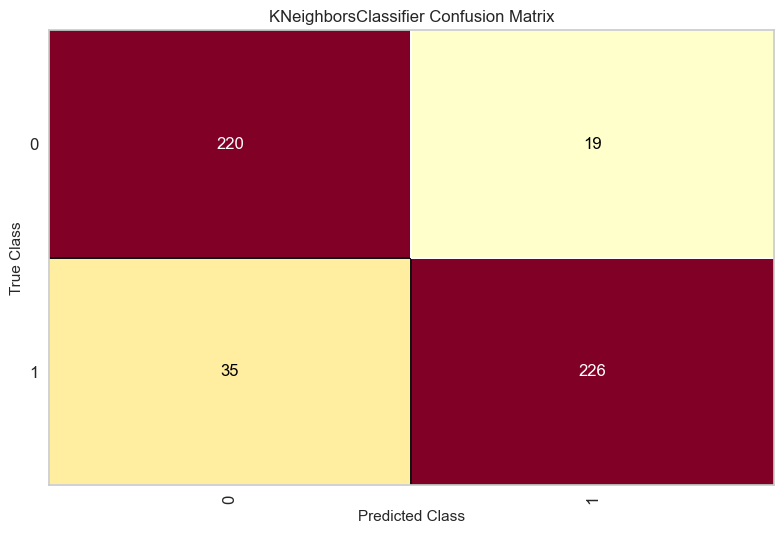

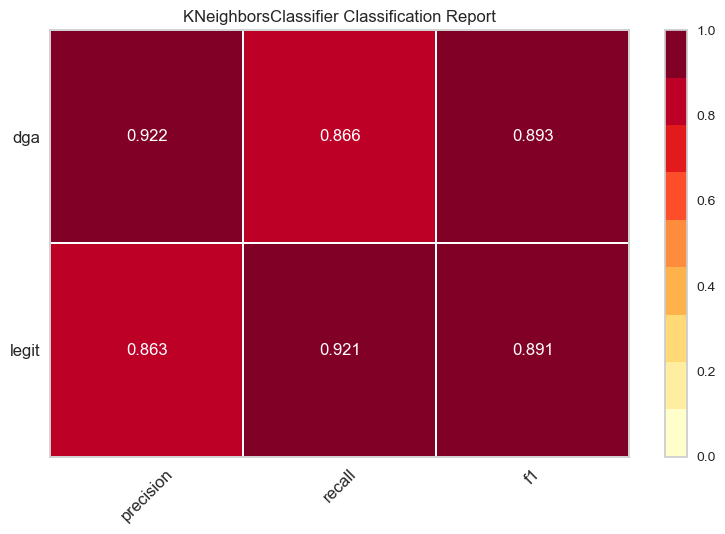

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [16]:
X_test_pred = knn_pipe.predict(X_test)
print(X_test_pred)
print('\n')
print(accuracy_score(y_test, X_test_pred))

#Confusion Matrix
matrix = ConfusionMatrix(knn_pipe)
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show()

#Classification Report
class_report = ClassificationReport(knn_pipe, classes =['legit', 'dga'])
class_report.fit(X_train, y_train)
class_report.score(X_test, y_test)
class_report.show()

Scaling the features did result in a small improvement: .85 accuracy to .88.  But let's see if we can't do even better.

### Using RandomSearchCV and GridSearchCV to tune Hyperparameters
Now that we've scaled the features and built a simple pipeline, let's try to tune the hyperparameters to see if we can improve the model performance.  Scikit-learn provides two methods for accomplishing this task: `RandomizedSearchCV` and `GridSearchCV`. 


* `GridSearchCV`:  GridSearch iterates through all possible combinations of tuning parameters to find the optimal combination. (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* `RandomizedSearchCV`:  RandomizedSearch interates through random combinations of paremeters to find the optimal combination.  While RandomizedSearch does not try every possible combination, is considerably faster than GridSearch and has been shown to get very close to the optimal combination in considerably less time.  (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) 

You can see in the results below, that the model was able to achieve **91.9%** accuracy with RandomSearch!   
```
[INFO] randomized search took 0.85 seconds
[INFO] grid search accuracy: 91.93%
[INFO] randomized search best parameters: {'clf__weights': 'uniform', 'clf__p': 1, 'clf__n_neighbors': 27, 'clf__metric': 'euclidean', 'clf__leaf_size': 25, 'clf__algorithm': 'kd_tree'}
```

Both `RandomizedSearchCV` and `GridSearchCV` require you to provide a grid of parameters.  You will need to refer to the documentation for the classifier you are using to get a list of paramenters for that particular model.  Also since we will be using the pipeline, you have to format the parameters correctly.  The name of the variable must be preceeded by the name of the step in your pipeline and two underscores.  For example.  If the classifier in the pipeline is called `clf`, and you have a tuning parameter called `metric`, the parameter grid would be as follows:
```python
params = {
    "clf__n_neighbors": np.arange(1, 50, 2),
    "clf__metric": ["euclidean", "cityblock"] 
}
```

### Your Task
Using either GridSearchCV or RandomizedSearchCV, improve the performance of your model.

In [17]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [18]:
knn_param = {'kneighborsclassifier__n_neighbors' : range(1,10), 
            'kneighborsclassifier__p' : range(1,5),
            'kneighborsclassifier__leaf_size': range(10,100,10),
            'kneighborsclassifier__weights' : ['uniform', 'distance']}

In [19]:
knn_gs = GridSearchCV(knn_pipe, knn_param)

knn_gs.fit(X_train, y_train)
knn_gs.best_params_

{'kneighborsclassifier__leaf_size': 10,
 'kneighborsclassifier__n_neighbors': 8,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [20]:
best_knn = knn_gs.best_estimator_
best_knn

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=8, p=1))])

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 

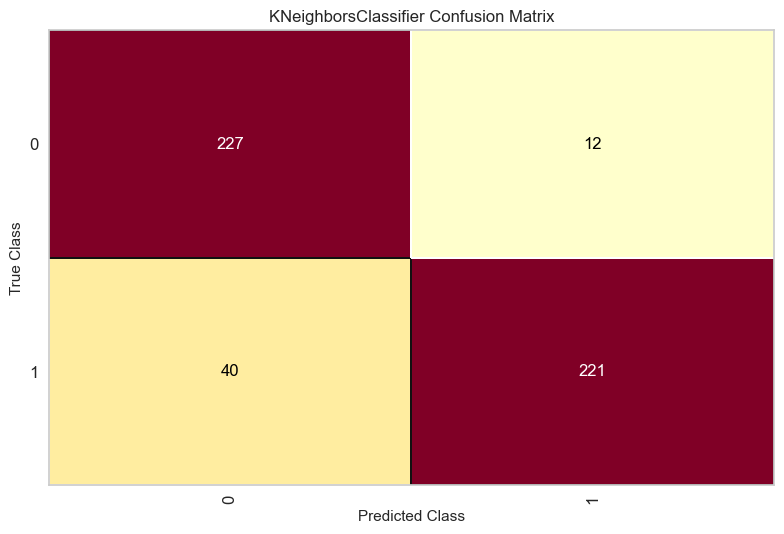

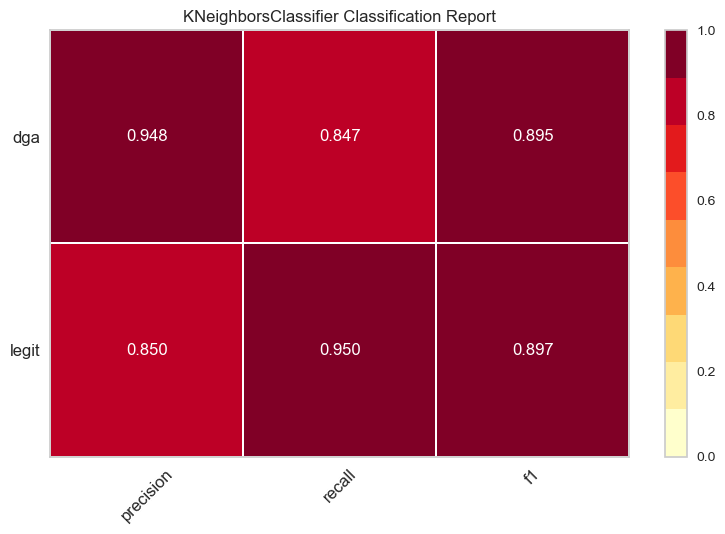

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [21]:
X_test_pred = best_knn.predict(X_test)
print(X_test_pred)
print('\n')
print(accuracy_score(y_test, X_test_pred))

#Confusion Matrix
matrix = ConfusionMatrix(best_knn)
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show()

#Classification Report
class_report = ClassificationReport(best_knn, classes =['legit', 'dga'])
class_report.fit(X_train, y_train)
class_report.score(X_test, y_test)
class_report.show()

In [25]:
n_iter_search = 20
knn_rs = RandomizedSearchCV(knn_pipe, knn_param, n_iter=n_iter_search)
knn_rs.fit(X_train, y_train)
knn_rs.best_params_

{'kneighborsclassifier__weights': 'uniform',
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__n_neighbors': 8,
 'kneighborsclassifier__leaf_size': 10}

In [26]:
best_knn_rs = knn_rs.best_estimator_
best_knn_rs

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=8, p=1))])

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 

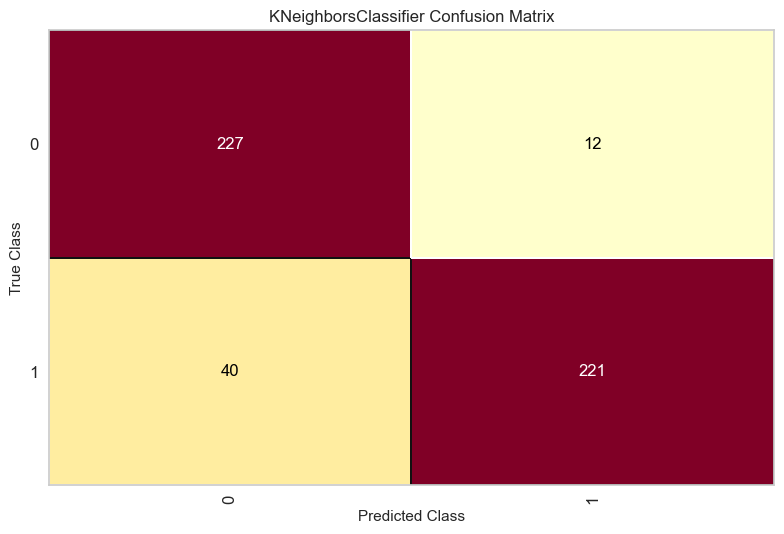

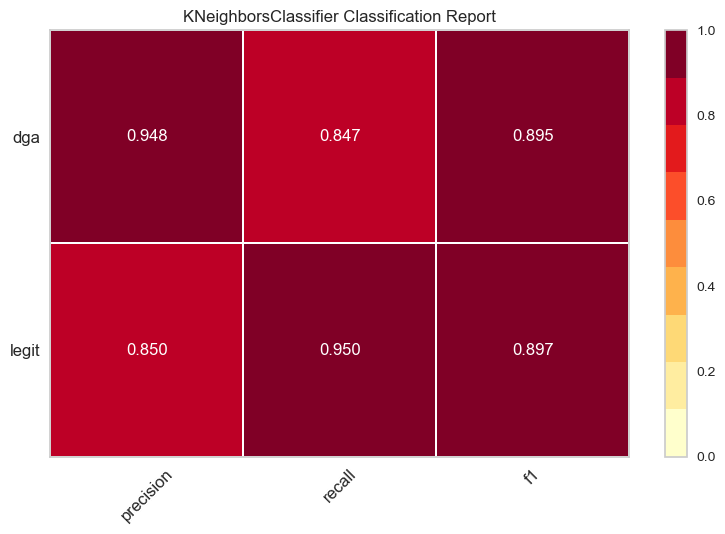

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [27]:
X_test_pred = best_knn_rs.predict(X_test)
print(X_test_pred)
print('\n')
print(accuracy_score(y_test, X_test_pred))

#Confusion Matrix
matrix = ConfusionMatrix(best_knn_rs)
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show()

#Classification Report
class_report = ClassificationReport(best_knn_rs, classes =['legit', 'dga'])
class_report.fit(X_train, y_train)
class_report.score(X_test, y_test)
class_report.show()

## Model Comparison
Your final task is to:
1.  Using RandomForest, create a classifier for the DGA dataset
2.  Use either GridSearchCV or RandomizedSearchCV to find the optimal parameters for this model.

How does this model compare with the first K-NN classifier for this data?

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 

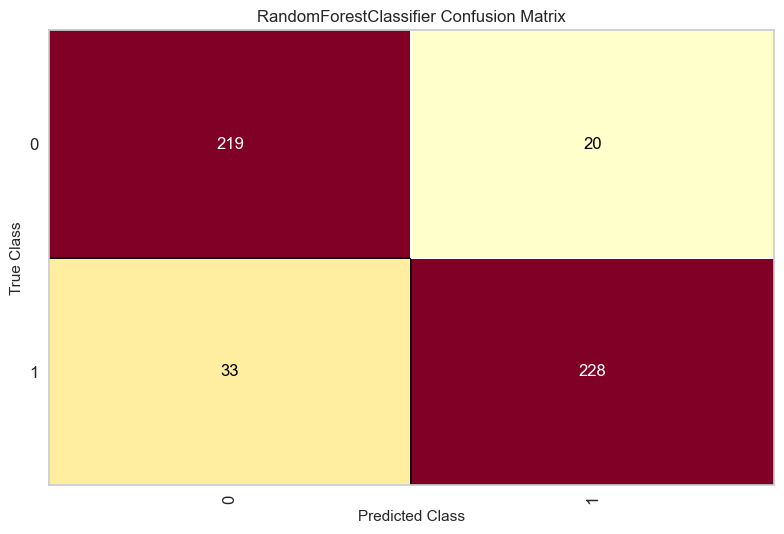

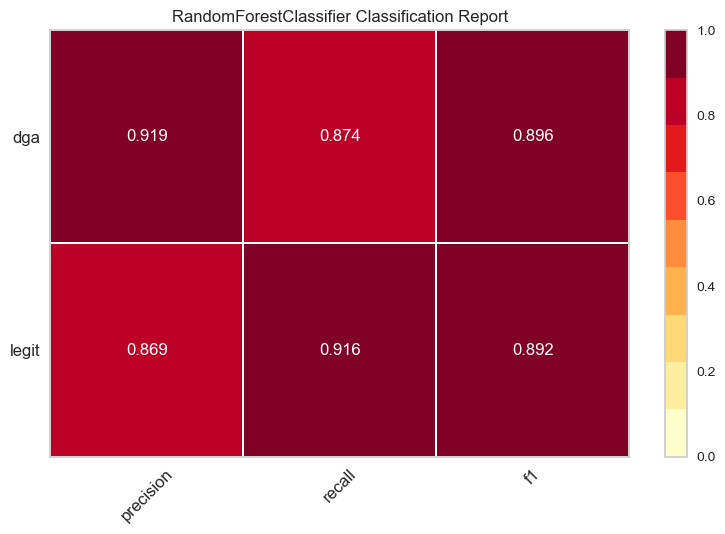

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [29]:
#Your code here...
rs = RandomForestClassifier()
rs_pipe = make_pipeline(scaler, rs)
rs_pipe.fit(X_train, y_train)

X_test_pred = rs_pipe.predict(X_test)
print(X_test_pred)
print('\n')
print(accuracy_score(y_test, X_test_pred))

#Confusion Matrix
matrix = ConfusionMatrix(rs_pipe)
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show()

#Classification Report
class_report = ClassificationReport(rs_pipe, classes =['legit', 'dga'])
class_report.fit(X_train, y_train)
class_report.score(X_test, y_test)
class_report.show()

In [30]:
rs_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 

In [32]:
rs_params = {'randomforestclassifier__max_depth': range(1, 10),
             'randomforestclassifier__n_estimators': range(100, 500, 50),
             'randomforestclassifier__min_samples_split': [2, 4]}

rs_gs = GridSearchCV(rs_pipe, rs_params)
rs_gs.fit(X_train, y_train)
rs_gs.best_params_
best_rs = rs_gs.best_estimator_

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 

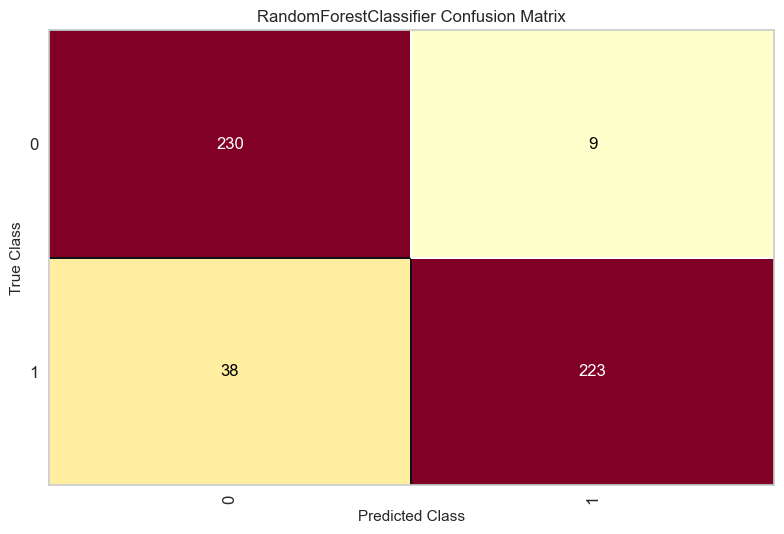

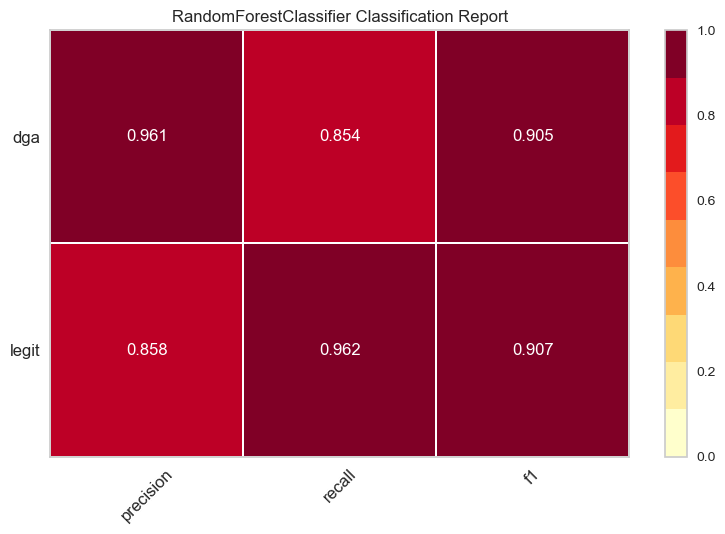

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [33]:
X_test_pred = best_rs.predict(X_test)
print(X_test_pred)
print('\n')
print(accuracy_score(y_test, X_test_pred))

#Confusion Matrix
matrix = ConfusionMatrix(best_rs)
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show()

#Classification Report
class_report = ClassificationReport(best_rs, classes =['legit', 'dga'])
class_report.fit(X_train, y_train)
class_report.score(X_test, y_test)
class_report.show()

In [36]:
n_iter_search = 20
rs_rs = RandomizedSearchCV(rs_pipe, rs_params, n_iter=n_iter_search)
rs_rs.fit(X_train, y_train)
rs_rs.best_params_
best_rs_rs = rs_gs.best_estimator_

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 

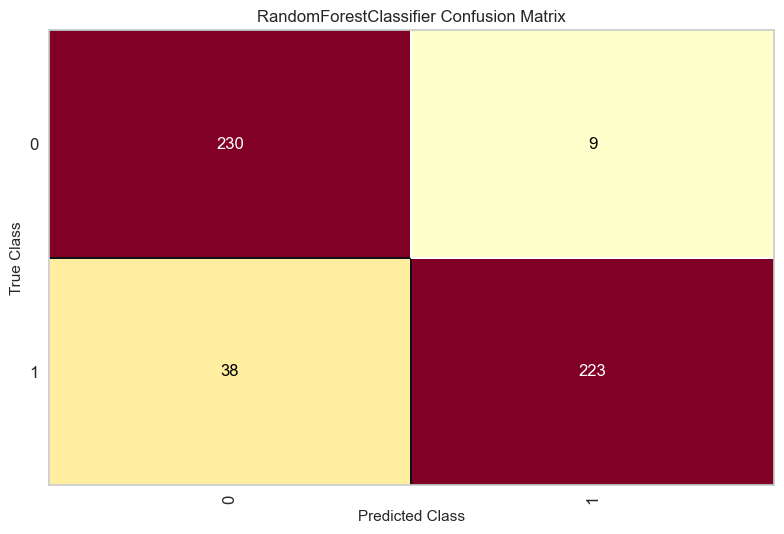

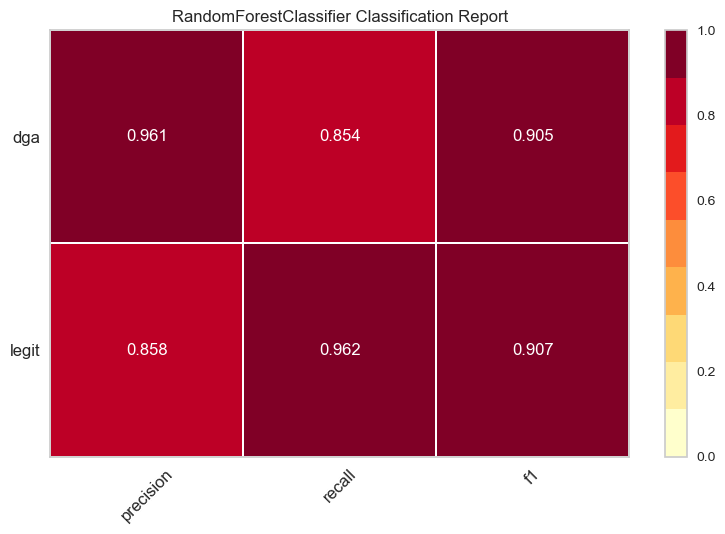

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [37]:
X_test_pred = best_rs_rs.predict(X_test)
print(X_test_pred)
print('\n')
print(accuracy_score(y_test, X_test_pred))

#Confusion Matrix
matrix = ConfusionMatrix(best_rs_rs)
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show()

#Classification Report
class_report = ClassificationReport(best_rs_rs, classes =['legit', 'dga'])
class_report.fit(X_train, y_train)
class_report.score(X_test, y_test)
class_report.show()